In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
from matplotlib import rcParams, cycler 
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator 
rcParams['font.family'] = 'sans-serif' 
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 16 
rcParams['axes.linewidth'] = 1.1 
rcParams['axes.labelpad'] = 10.0 
rcParams['axes.xmargin'] = 0 
rcParams['axes.ymargin'] = 0 
rcParams.update({
    "figure.figsize" : (8.4,4.8), "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946, "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965, "axes.autolimit_mode" : "round_numbers", "xtick.major.size" : 7, "xtick.minor.size" : 3.5, "xtick.major.width" : 1.1, "xtick.minor.width" : 1.1, "xtick.major.pad" : 5, "xtick.minor.visible" : True, "ytick.major.size" : 7, "ytick.minor.size" : 3.5, "ytick.major.width" : 1.1, "ytick.minor.width" : 1.1, "ytick.major.pad" : 5, "ytick.minor.visible" : True, "lines.markersize" : 10, "lines.markerfacecolor" : "none", "lines.markeredgewidth" : 0.8
    }) 

In [103]:
years = [2017 + i for i in range(7)]
periods = {
    2017: 'Before', 2018: 'Before', 2019: 'Before',
    2020: 'During', 2021: 'During', 2022: 'During',
    2023: 'After'
}
months = [3, 4, 5]

In [104]:
whole_df = pd.DataFrame(np.zeros((1, 5)), columns=['date_time', 'year', 'hour', 'period', 'no2'])

for y in years:
    for m in months:
        raw = pd.read_csv(f'data\\{y}.{m}.csv')
        raw.columns = ['date_time', 'no2']
        raw = raw[raw['no2'].notna()]

        year_hour = pd.DataFrame(np.zeros((raw.shape[0], 4)), columns=['date_time', 'year', 'hour', 'period'], dtype=object)
        if y != 2023:
            divider = ' '
        else:
            divider = ':'
        for i in range(raw.shape[0]):
                year_hour.iloc[i, 0] = raw.iloc[i, 0]
                time = raw.iloc[i, 0].split(divider)
                year_hour.iloc[i, 1] = int(time[0][0:4])
                year_hour.iloc[i, 2] = int(time[1])
                year_hour.iloc[i, 3] = periods[y]

        raw = year_hour.merge(raw, how='inner', on='date_time')
        whole_df = pd.concat((whole_df, raw))

whole_df = whole_df.iloc[1:, 1:]
whole_df

,year,hour,period,no2
0,2017,1,Before,0.048
1,2017,2,Before,0.052
2,2017,3,Before,0.066
3,2017,4,Before,0.065
4,2017,5,Before,0.062
...,...,...,...,...
735,2023,5,After,0.011
736,2023,4,After,0.010
737,2023,3,After,0.011
738,2023,2,After,0.011


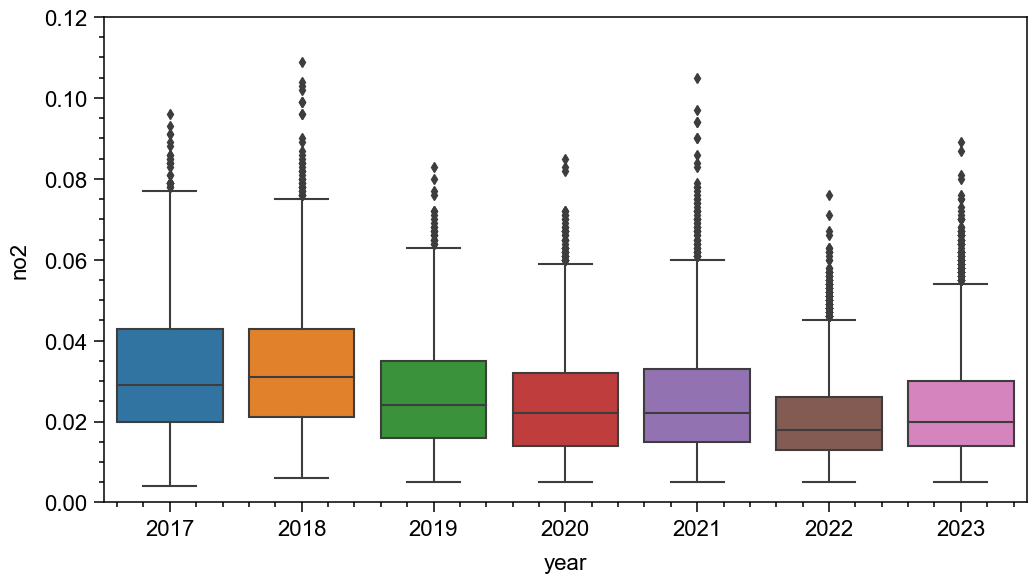

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=whole_df['year'], y=whole_df['no2'])
plt.show()

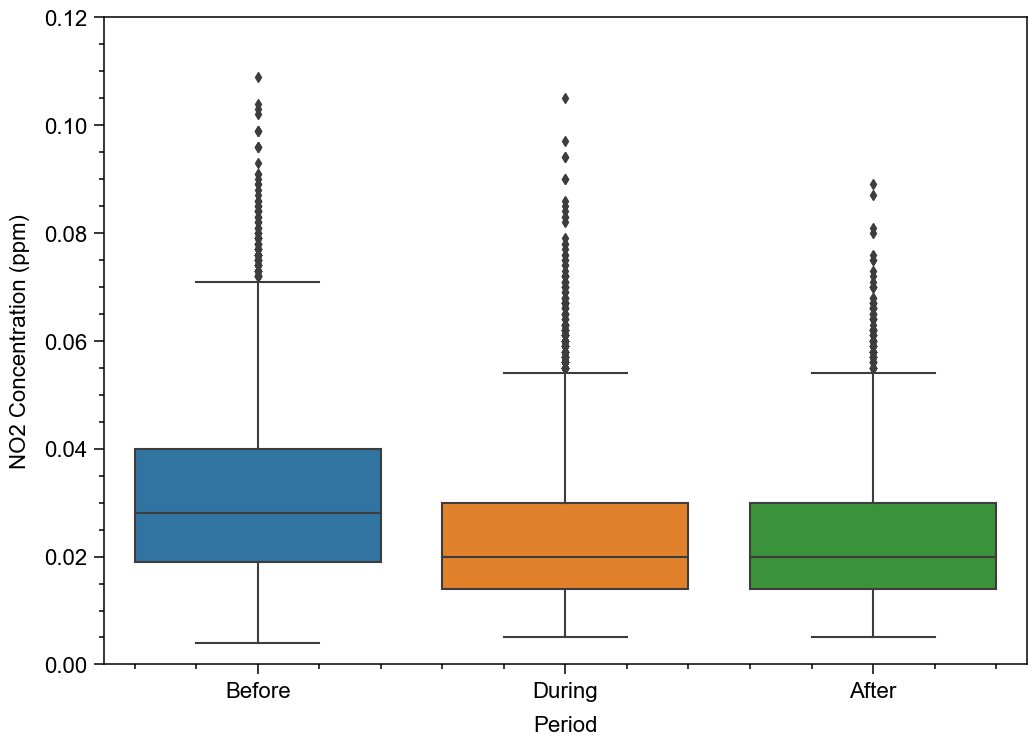

In [106]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=whole_df['period'], y=whole_df['no2'])
plt.xlabel('Period')
plt.ylabel('NO2 Concentration (ppm)')
plt.savefig('no2_by_period.png')
plt.show()

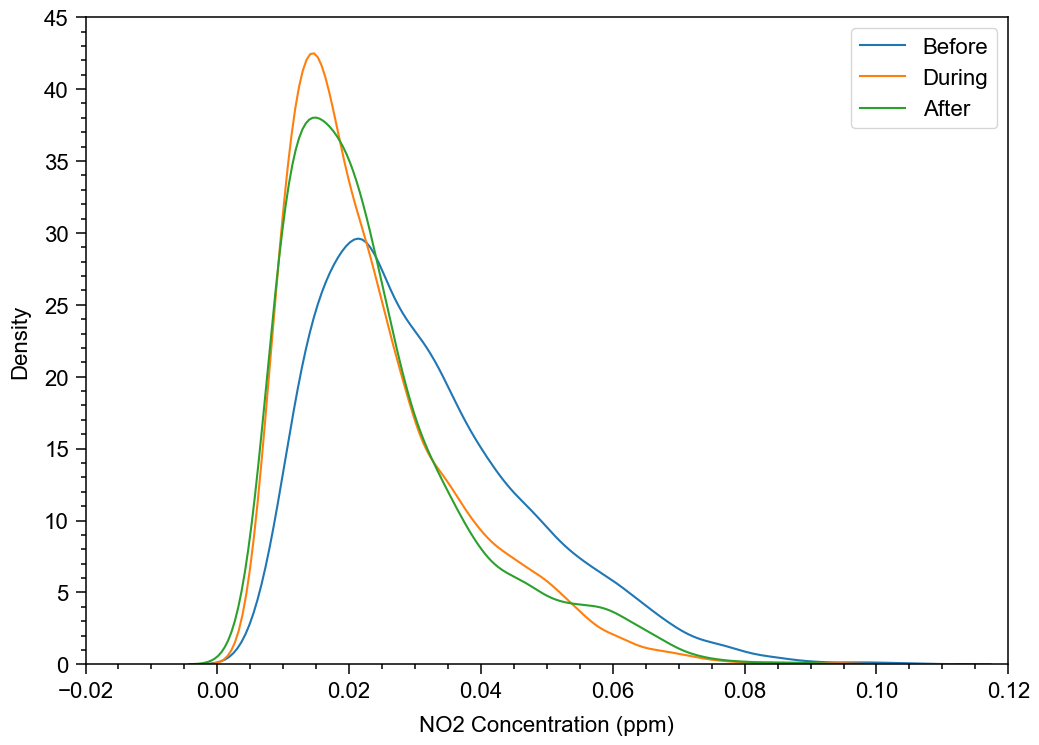

In [107]:
plt.figure(figsize=(12, 8))
sns.kdeplot(whole_df[whole_df['period'] == 'Before']['no2'], label='Before')
sns.kdeplot(whole_df[whole_df['period'] == 'During']['no2'], label='During')
sns.kdeplot(whole_df[whole_df['period'] == 'After']['no2'], label='After')

plt.legend()
plt.xlabel('NO2 Concentration (ppm)')
plt.savefig('densityplot_by_period.png')
plt.show()

In [108]:
whole_df[whole_df['period'] == 'Before']['no2'].describe()

count    6455.000000
mean        0.031237
std         0.015985
min         0.004000
25%         0.019000
50%         0.028000
75%         0.040000
max         0.109000
Name: no2, dtype: float64

In [109]:
whole_df[whole_df['period'] == 'During']['no2'].describe()

count    6580.000000
mean        0.023725
std         0.013363
min         0.005000
25%         0.014000
50%         0.020000
75%         0.030000
max         0.105000
Name: no2, dtype: float64

In [110]:
whole_df[whole_df['period'] == 'After']['no2'].describe()

count    2195.000000
mean        0.024000
std         0.013983
min         0.005000
25%         0.014000
50%         0.020000
75%         0.030000
max         0.089000
Name: no2, dtype: float64

In [114]:
import scipy as sp

periods_set = list(set(periods.values()))
for i in range(2):
    for j in range(i + 1, 3):
        print(f'{periods_set[i]} vs {periods_set[j]}')
        res = sp.stats.levene(
            whole_df[whole_df['period'] == periods_set[i]]['no2'],
            whole_df[whole_df['period'] == periods_set[j]]['no2']
            )
        print(res)

Before vs After
LeveneResult(statistic=76.22883564175565, pvalue=2.998470039351367e-18)
Before vs During
LeveneResult(statistic=202.08443507880995, pvalue=1.6033881391726354e-45)
After vs During
LeveneResult(statistic=1.088543320803665, pvalue=0.2968229356070585)


전 & 후 or 전 & 중은 분산 다름   
중 & 후는 분산 다르다고 할 수 없음

In [117]:
for i in range(2):
    for j in range(i + 1, 3):
        print(f'{periods_set[i]} vs {periods_set[j]}')
        res = sp.stats.ttest_ind(
            whole_df[whole_df['period'] == periods_set[i]]['no2'],
            whole_df[whole_df['period'] == periods_set[j]]['no2'],
            equal_var=(periods_set[i] == 'After' and periods_set[j] == 'During')
            )
        print(res)

Before vs After
TtestResult(statistic=20.17506839689645, pvalue=1.498186044956145e-86, df=4289.225598703558)
Before vs During
TtestResult(statistic=29.079241686189302, pvalue=5.665151376479575e-180, df=12550.164658150265)
After vs During
TtestResult(statistic=0.8240102566730224, pvalue=0.40995613081574334, df=8773.0)
